# Clustering

## Introduction
#### In this part, our feature data X is the TFIDF format converted from our crawled Twitter content. TFIDF, short for term frequency–inverse document frequency, is a numerical statistic. The effect of this format aims to reflect how important a word is to a document in a collection or corpus. And also there is other fomrat like BOW, which treats every word equally while TFIDF wants to weight the importance of diffierent word. And in this case, we suggest that the TFIDF value can increase to the number of times one word in the document proportionally and can be offset by the number of documents in the corpus having the word. In this way, it can help people to adjust as some words appear more frequently in general, as articles, conjunctions and demonstrative pronouns.

### Load Data
#### In this part, we will focus on dealing with text data.

In [1]:
import pandas as pd
df = pd.read_csv("data/01-modified-data/textcleaning_py.csv")

#### Let's take a look of our labeled text data as it shows below.

In [2]:
df.head()

,id,retweet_count,retweeted,Clean_Text
0,1570097774930132992,1060,True,rt nickiminaj let hope ppl guy r dirty work lo...
1,1570097774355709954,0,False,ciaoszn charity work ☺ ️ ☺ ️ ☺ ️
2,1570097773839630337,53,True,rt marii_chaudhry congratulations team wepatri...
3,1570097773697015808,179,True,rt fact not wish work
4,1570097773672042498,161,True,rt jeonmanwon seungcheol suspicious like puppe...


In [8]:
from sklearn.model_selection import train_test_split
X = df["Clean_Text"]
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer()
Xcount = countvect.fit_transform(X)
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(use_idf=False).fit(Xcount)
Xtf = tf.transform(Xcount)
tfidf = TfidfTransformer()
X = tfidf.fit_transform(Xcount)

## Theory
### K-means
#### K-means clustering is a kind of unsupervised partition-based clustering and it is used when modeling on unlabeled data. This means that there are some situations that we don't know how to define groups or categories by ourselves. This algorithm aims to find how to group the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point a lable among K groups with input features. Basicly, these data points will be assign a label based on feature similarity. 
#### From the K-means algorithm, we can get two things as results. First, the centroids of the K clusters, which is used to label new data points. Second, the labels of training data and one data point can only have one label. In this algorithm, one important thing is that how to choose K, that is, how many groups can be determined. The centroids of a cluster is a collection of features determine the results. And by examining the distances between data points and the centroids and find the centroids with the shortest distance then find the label for the datapoint.  
 
### DBSAN
#### DBSAN clustering is a kind of unsupervised density-based clustering and it is used when modeling on unlabeled data. Compared with K-means clustering, we know that K-means clustering is very useful on normal shaped clusters question while DBSAN is more efficient on arbitrary shaped clusters or decting outliers. Because DBSAN is a kind of density-based clustering, it can be used in fingding high-density regions and outliers. 
#### From the DBSAN algorithm, there are two important parameters, eps and minPts. Eps is the distance used as defining as neighborhoods. It is obvious that if the distance between two points is shorter or equal to eps, then they are defined as neighborhoods. MinPts is the minimum number of data points used as defining as a cluster. According to these two parameters, points can be assigned as core points, border points and outliers. Core point is the point that at least minPts number of points in its surrounding area with radius eps. Border point is the point that it is reachable from a core point and there are less than minPts number of points within its surrounding area.  Outlier is the point that is not a core point and not reachable from any core points. In general, the main idea of DBSAN clustering is to assign a point to a cluster when it is close to many points from that cluster.
### Hierarchical clustering
#### Hierarchical Clustering is a kind of unsupervised partition-based clustering that creates clusters in a hierarchical tree-like structure, a Dendrogram. In other words, this algorithm create a subset of similar data in a tree-like structure and in this structure, the root node corresponds to the whole data, and create branches from the root node to form several clusters. 
#### From the hierarchical clustering algorithm, we first define each data point as a cluster. Then when we find the closest pair of clusters based on different measures, like Euclidean Distance, Manhattan Distance, Cosine Similarity and etc. And the measures here is to measure the distance between two clusters rather than data points. We will merge them to a new cluster, then we will have less clutsers, N-1 clusters. Then We repeat these process, merging these clusters untile all data points are clustered into on cluster with size N. 




## Methods
### Data selection
#### As we have split these data into X and Y, we need to remove the labels Y as needed so that it is suitable for clustering. So we will use X without Y.

### Hyper-parameter tuning
#### K-means

In [9]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans

In [40]:
from scipy.spatial import distance
inertia=[]
distortion=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(distance.cdist(X.todense(),kmeans.cluster_centers_, 'euclidean'),axis=1)) /X.shape[0])
elbow = pd.DataFrame()
elbow["Cluster"]= range(1,11)
elbow["Distortion"]=distortion
elbow["Inertia"] =inertia
elbow


,Cluster,Distortion,Inertia
0,1,0.982791,96.604898
1,2,0.953220,93.690212
2,3,0.926276,90.397537
3,4,0.915840,88.370503
4,5,0.908825,87.037381
5,6,0.878494,84.375945
6,7,0.872592,83.036395
7,8,0.863367,81.553633
8,9,0.853706,79.869738
9,10,0.833325,77.852677


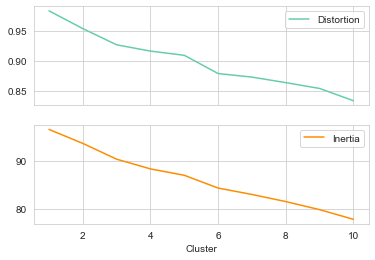

In [41]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(elbow["Cluster"],elbow["Distortion"],color="mediumaquamarine",label = "Distortion")
ax[1].plot(elbow["Cluster"],elbow["Inertia"], color = "darkorange",label = "Inertia")
ax[0].legend()
ax[1].legend()
plt.xlabel('Cluster')
plt.show()

From the above figure, 3 is the optimal number of clusters.

In [26]:
from sklearn.metrics import silhouette_score
silhouette=[]
cluster = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    if(len(np.unique(kmeans.fit_predict(X)))>1):
        silhouette.append(silhouette_score(X, kmeans.fit_predict(X)))
        cluster.append(i)

In [27]:
Silhouette_df = pd.DataFrame()
Silhouette_df["Cluster"]= cluster
Silhouette_df["silhouette_score"] = silhouette

In [28]:
Silhouette_df

,Cluster,silhouette_score
0,2,0.035416
1,3,0.052903
2,4,0.058709
3,5,0.058653
4,6,0.092548
5,7,0.089785
6,8,0.094565
7,9,0.099191
8,10,0.121758


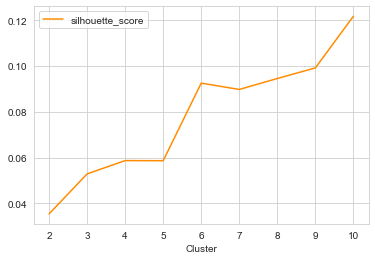

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, sharex=True)
ax.plot(Silhouette_df["Cluster"],Silhouette_df["silhouette_score"], color = "darkorange",label = "silhouette_score")
ax.legend()
plt.xlabel('Cluster')
plt.show()

From the above plot, 10 is the optimal number of clusters.

### DBSCAN

In [30]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.


import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
 
# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
            num_cluster = len(np.unique(db.fit_predict(X)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters,num_cluster]], columns=["silhouette_scores", "parameters","num_cluster"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='silhouette_scores', ascending=False).head(1)

,silhouette_scores,parameters,num_cluster
0,0.153333,eps:0.1 min_sample :2,7


In [31]:
silhouette_scores_data.head()

,silhouette_scores,parameters,num_cluster
0,0.153333,eps:0.1 min_sample :2,7
0,0.081231,eps:0.1 min_sample :3,3
0,0.052160,eps:0.1 min_sample :4,2
0,0.153333,eps:0.1 min_sample :2,7
0,0.081231,eps:0.1 min_sample :3,3


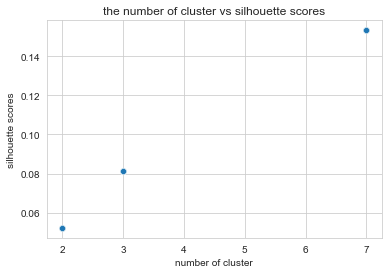

In [34]:
sns.set_style("whitegrid")
ax = sns.scatterplot(data=silhouette_scores_data, x="num_cluster", y="silhouette_scores")
ax.set(xlabel='number of cluster', ylabel='silhouette scores')
plt.title("the number of cluster vs silhouette scores")
plt.show()

From the above plot, the optimal one should have the highest silhouette score, that is, the number of clusters should be 7 with the eps is 0.1 and min_sample is 2.


### Hierarchical clustering

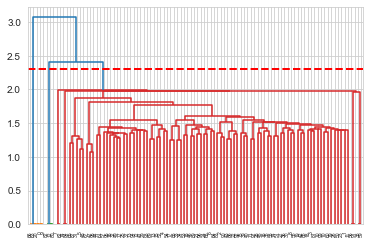

In [37]:
# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X.todense(),method="ward"))
plt.axhline(2.3,color = "red", linewidth=2,linestyle="--")

From the above plot, 3 is the optimal clusters.

### Final results
#### K-means
According to eblow method, the optimal number of clutsers is 3

In [55]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(X)
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

According to silhouette method, the optimal number of clusters is 10.

In [46]:
kmeans = KMeans(n_clusters=10, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(X)
kmeans.labels_

array([2, 0, 5, 5, 0, 1, 1, 5, 7, 2, 0, 0, 6, 1, 7, 0, 0, 1, 5, 1, 2, 5,
       1, 0, 3, 0, 0, 9, 1, 0, 5, 1, 0, 3, 3, 0, 7, 0, 4, 8, 1, 0, 5, 1,
       5, 5, 5, 8, 1, 0, 0, 7, 1, 5, 0, 7, 9, 0, 0, 4, 0, 0, 5, 2, 1, 1,
       2, 8, 9, 0, 5, 0, 3, 0, 3, 0, 5, 0, 1, 0, 6, 5, 6, 5, 3, 0, 0, 1,
       0, 5, 1, 9, 0, 0, 1, 0, 5, 5, 8, 5], dtype=int32)

#### DBSCAN

In [47]:
db = DBSCAN(eps=0.1, min_samples=2)
db.fit(X)
db.labels_

array([ 0, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  4, -1, -1,  3, -1, -1,  1,  0, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,  2, -1,  2, -1,  5,
       -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1])

#### Hierarchical clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(X.toarray())
clustering_model.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Results

In [53]:
Y = df["retweeted"]
Y.tolist()

[True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

Based on the results of the above clustering method model, we get the prediction of the data. Comparing them with the labels of the data itself, we can see some similarities. Most data points in the data are classified as a cluster. Within these three kind of clustering methods, I think the best method is k-means with 3 as the number of cluster because this method is much easier and more efficient than others. In this problem, we know that as these tweets are collect by using keywords, "work", so too much clusters is meaningless and we can not interpret the meaning of the clusters of these tweet concepts.

From the results, we can find that there are a lot of data points having the same clusters while other clusters only having several data points as we can see in the below two figures. As retweeted and clusters have some similarity but there is still difference between them. This is because we use the TFIDF of tweets collected, we use the same keywords to collect them so there should be some similarity, but there are some metrics we don't know in these tweets, it can be influenced by tweets' attitude, sentiment and even the posters' location, because they have different word usage. 

But these results help me to explore more as these three clustering methods tell me that there are many data points these three clustering methods assigned them the same clusters, and it makes me to be interested in explore these tweets with the same clusters to find if these tweets have the same attitude and sentiment.

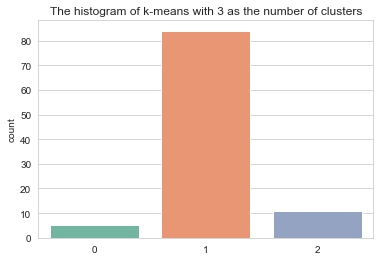

In [57]:
sns.set_style("whitegrid")
sns.countplot(x =kmeans.labels_,palette = "Set2")
# Show the plot
plt.title("The histogram of k-means with 3 as the number of clusters")
plt.show()

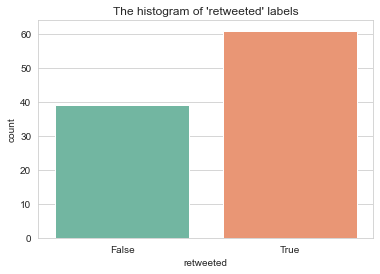

In [58]:
sns.countplot(x =Y,palette = "Set2")
# Show the plot
plt.title("The histogram of 'retweeted' labels")
plt.show()

## Conclusions

### In general, the above results show us a phenomenon that we can judge whether such tweets can be forwarded and attract people's attention through the analysis of tweets. And there should be some similarity between the word frequency of tweets. And we need to explore the similarity between the these tweets with the same clusters assigned from these three clustering methods. From the above results, it gives us a new direction. Although through clustering methods, we don't the what the exact interpretation of these clusters. And the tweets with the same keywords have similarities in the use of words. 

### As a popular social media, Twitter can not only enhance people's sense of social belonging, but also help them gain attention, reputation, fans and profit from it if they can get more forwarding volume and attention from it. For such an information age, it is beneficial for both the platform and bloggers to receive more attention.

### Such a study makes me more confident to observe the effect of more than the text itself on improving the quality of user accounts by comparing the users' location, usage of word and the attitude of tweets.

## Reference
### Yildirim, S. (2020, April 22). DBSCAN clustering — explained - towardsdatascience.com. DBSCAN Clustering — Explained. Retrieved November 14, 2022, from https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556 
### Team, G. L. (2022, October 31). What is hierarchical clustering? an introduction to hierarchical clustering. Great Learning Blog: Free Resources what Matters to shape your Career! Retrieved November 13, 2022, from https://www.mygreatlearning.com/blog/hierarchical-clustering/#:~:text=Hierarchical%20Clustering%20creates%20clusters%20in,node%20to%20form%20several%20clusters. 
### Trevino, A. (2016, December 6). Introduction to K-means Clustering. Blogs.oracle.com. Retrieved November 13, 2022, from https://blogs.oracle.com/ai-and-datascience/post/introduction-to-k-means-clustering 